### Part 2: Insertions - Random Selection of Structural Variants


** Background**
- 5000 Insertions and 5000 Deletions were randomly selected from our union callset of sequence resolved variants.

- **3991** unique insertions are described below.

- Features were generated by svviz to describe each variant

- tSNE was used to visualize the structure of the data

- The goal is to randomly select datapoints from each unique group/tSNE cluster and distribute these selected variants for manual curation. 

- In order to randomly select samples from each unique tSNE cluster, DBSCAN will be used to generate cluster labels. For each set of DBSCAN cluster labels, a select number will be randomly selected from each cluster group.

**Technical Overview**

Part 2

- Secondary DBSCAN analyses to generate cluster groups
- The resulting dataframe tSNE analysis was run through a DBSCAN model in min_samples altered for each iteration; min_samples = 0, 5, 10, 15, 20
- For each interation of the min_sample/DBSCAN analysis, the following is displayed:
    - tSNE plot with DSCAN clusters
    - Histogram displaying the frequency of each cluter label
    - Cumulative distribution plot for each histogram
- The following analysis only shows DBSCAN results from tSNE alone (excludes SVD results). Given the results from the itnital analysis, I think that the DBSCAN/tSNE results gives the best representation of the data.

***
** Part 2 **
***

In [5]:
'''
Import statements
'''
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
import sqlite3
from sklearn.manifold import TSNE
import bokeh.palettes as palettes
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [6]:
'''
Load Data
'''
df = pd.read_csv('dftsne_ins.csv')
minSample0 = pd.read_csv('INS.tSNE_minSample_0.csv')
minSample5 = pd.read_csv('INS.tSNE_minSample_5.csv')
minSample10 = pd.read_csv('INS.tSNE_minSample_10.csv')
minSample15 = pd.read_csv('INS.tSNE_minSample_15.csv')
minSample20 = pd.read_csv('INS.tSNE_minSample_20.csv')

In [7]:
df['minSample0'] = minSample0['clusterLabel']
df['minSample5'] = minSample5['clusterLabel']
df['minSample10'] = minSample10['clusterLabel']
df['minSample15'] = minSample15['clusterLabel']
df['minSample20'] = minSample20['clusterLabel']

** DBSCAN Minimum Samples: 0 **

In [8]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample0']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample0"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample0', palette=palettes.Category20[20],tools=[hover])
output_file("tSNE_DBSCAN_INS_minSample0_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF **

 19    284
-1     264
 11    246
 8     198
 10    196
 7     188
 21    185
 4     174
 26    127
 39    109
 12    107
 25     91
 6      90
 34     88
 3      81
 43     76
 32     68
 55     57
 41     54
 58     53
 46     43
 60     43
 49     41
 2      40
 15     37
 5      35
 16     34
 62     33
 36     32
 40     30
      ... 
 45     10
 24     10
 44     10
 64      9
 42      9
 53      9
 17      9
 51      9
 86      8
 52      8
 94      8
 13      8
 22      7
 73      7
 23      7
 74      6
 84      6
 91      6
 87      6
 85      6
 81      6
 31      6
 69      6
 90      6
 95      5
 48      5
 78      5
 92      5
 93      5
 0       5
Name: minSample0, dtype: int64


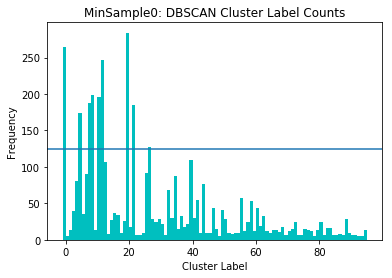

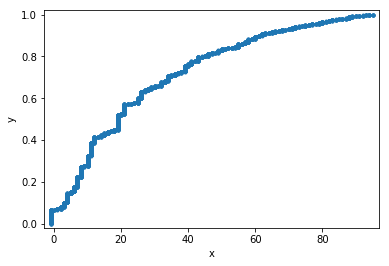

In [9]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample0']
counting = df.groupby('minSample0').count()
countr = df['minSample0'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample0: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample0'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample0'])) / (len(df['minSample0']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 5 **

In [10]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample5']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample5"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample5', palette=palettes.Category20[20],tools=[hover])
output_file("tSNE_DBSCAN_INS_minSample5_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF **

 18    321
 10    279
-1     255
 6     245
 20    221
 7     214
 3     202
 9     172
 11    163
 24    156
 5     101
 29     90
 23     89
 2      80
 35     76
 28     69
 38     61
 53     49
 33     47
 49     45
 39     45
 25     42
 44     42
 1      40
 50     39
 14     37
 21     34
 15     33
 31     32
 4      31
      ... 
 79     10
 22      9
 34      9
 42      9
 46      9
 16      9
 52      9
 19      9
 12      8
 45      8
 84      8
 51      8
 78      8
 73      8
 27      6
 74      6
 82      6
 59      6
 80      6
 81      5
 83      5
 77      5
 72      5
 71      5
 67      5
 41      5
 85      5
 86      5
 76      5
 87      5
Name: minSample5, dtype: int64


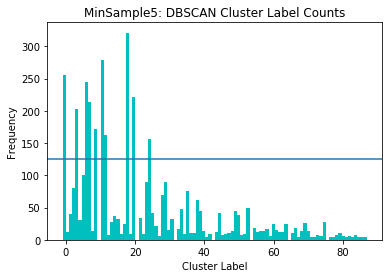

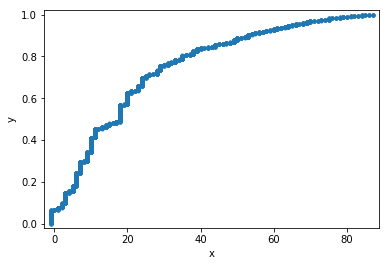

In [11]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample5']
counting = df.groupby('minSample5').count()
countr = df['minSample5'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample5: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample5'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample5'])) / (len(df['minSample5']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 10 **

In [12]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample10']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample10"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample10', palette=palettes.Category20[20],tools=[hover])
output_file("tSNE_DBSCAN_INS_minSample10_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF **

-1     799
 14    277
 4     196
 7     194
 5     184
 15    168
 2     165
 8     118
 9     102
 16     87
 3      84
 28     80
 1      77
 31     75
 22     65
 47     59
 33     55
 30     49
 29     48
 38     43
 41     43
 34     42
 40     42
 18     41
 39     39
 0      38
 13     36
 11     36
 43     33
 25     32
      ... 
 27     17
 58     16
 37     16
 49     16
 45     15
 56     15
 61     14
 44     14
 24     14
 51     13
 65     13
 6      13
 35     13
 53     13
 66     13
 70     12
 17     12
 48     12
 63     12
 36     11
 59     11
 54     11
 67     11
 32     10
 26     10
 69     10
 57     10
 64     10
 71     10
 68      8
Name: minSample10, dtype: int64


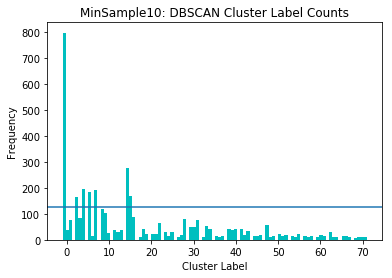

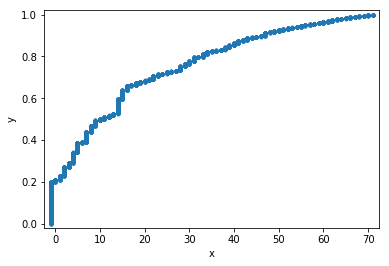

In [13]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample10']
counting = df.groupby('minSample10').count()
countr = df['minSample10'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample10: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample10'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample10'])) / (len(df['minSample10']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 15 **

In [14]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample15']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample15"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample15', palette=palettes.Category20[20],tools=[hover])
output_file("tSNE_DBSCAN_INS_minSample15_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF ***

-1     1433
 8      152
 10     135
 3      108
 11     103
 2      101
 4       93
 12      86
 29      83
 23      79
 14      76
 7       73
 1       69
 18      63
 28      62
 19      61
 26      59
 32      54
 25      49
 24      48
 56      46
 39      42
 27      40
 0       38
 44      36
 40      36
 17      36
 13      35
 9       34
 42      34
       ... 
 57      31
 37      29
 48      28
 5       25
 45      24
 6       24
 31      24
 51      23
 47      23
 22      23
 34      23
 41      22
 16      22
 15      20
 55      20
 53      19
 33      19
 30      18
 38      17
 43      17
 21      17
 35      16
 49      15
 36      15
 50      15
 52      15
 54      15
 58      15
 59      11
 46      10
Name: minSample15, dtype: int64


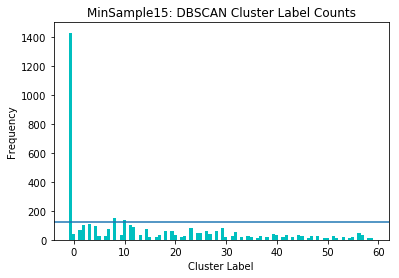

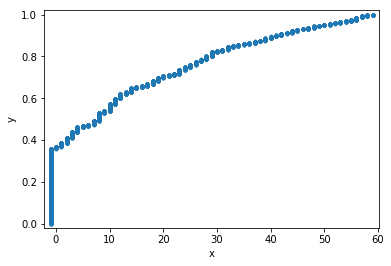

In [15]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample15']
counting = df.groupby('minSample15').count()
countr = df['minSample15'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample15: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample15'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample15'])) / (len(df['minSample15']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 20 **

In [16]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample20']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample20"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample20', palette=palettes.Category20[20],tools=[hover])
output_file("tSNE_DBSCAN_INS_minSample20_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF **

-1     1433
 8      152
 10     135
 3      108
 11     103
 2      101
 4       93
 12      86
 29      83
 23      79
 14      76
 7       73
 1       69
 18      63
 28      62
 19      61
 26      59
 32      54
 25      49
 24      48
 56      46
 39      42
 27      40
 0       38
 44      36
 40      36
 17      36
 13      35
 9       34
 42      34
       ... 
 57      31
 37      29
 48      28
 5       25
 45      24
 6       24
 31      24
 51      23
 47      23
 22      23
 34      23
 41      22
 16      22
 15      20
 55      20
 53      19
 33      19
 30      18
 38      17
 43      17
 21      17
 35      16
 49      15
 36      15
 50      15
 52      15
 54      15
 58      15
 59      11
 46      10
Name: minSample15, dtype: int64


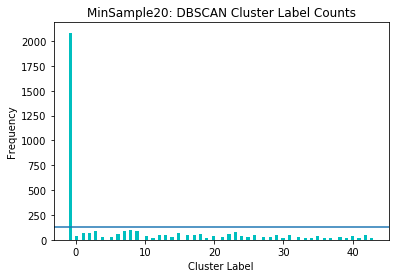

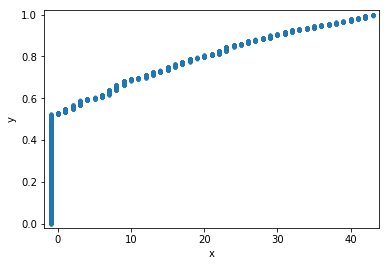

In [17]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample20']
counting = df.groupby('minSample20').count()
countr = df['minSample15'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample20: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample20'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample20'])) / (len(df['minSample20']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()